# 1. PHẦN MÔ HÌNH K- TRUNG BÌNH (K-MEANS MODEL)

## Ví dụ 1

In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
np.random.seed(11)
# Kỳ vọng và hiệp phương sai của 3 cụm dữ liệu
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
# Số điểm mỗi cụm dữ liệu
N = 500
# Tạo các cụm dữ liệu qua phân bố chuẩn (Gaussian)
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)
# Tổng hợp dữ liệu từ các cụm
X = np.concatenate((X0, X1, X2), axis = 0)
# Số cụm = 3
K = 3
# Gán nhãn ban đầu cho các cụm, sau đó ta test model và so sánh
original_label = np.asarray([0]*N + [1]*N + [2]*N).T

Phương thức để hiển thị dữ liệu X lên mặt phẳng, ở đây sử dụng thông tin nhãn đã được gán ở phần trước
trong tham đối label

In [16]:
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)
    plt.axis('equal')
    plt.plot()
    plt.show()

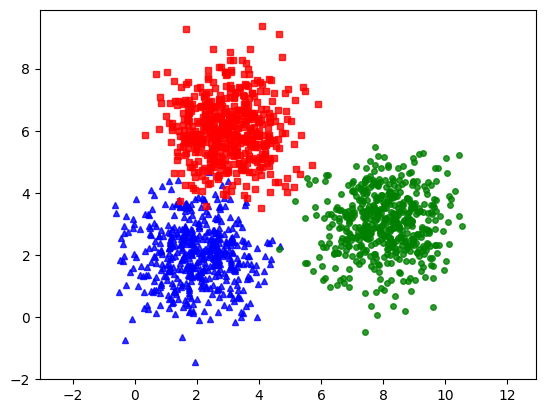

In [17]:
kmeans_display(X, original_label)

Dưới đây ta sẽ xây dựng một số hàm cần thiết cho mô hình K-means clustering<br>
    • kmeans_init_centers để khởi tạo các centers ban đầu.<br>
    • kmeans_asign_labels để gán nhán mới cho các điểm khi biết các centers.<br>
    • kmeans_update_centers để cập nhật các centers mới dữa trên dữ liệu vừa được gán nhãn.<br>
    • has_converged để kiểm tra điều kiện dừng của thuật toán.<br>
Khởi tạo một bộ tâm cụm trên dữ liệu X với giả thiết có k cụm

In [3]:
def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace=False)]

Ở đây chúng ta chọn các tâm cụm một cách ngẫu nhiên (miễn là các tâm cụm khác nhau). Các bạn hãy thử
điều chỉnh bằng cách chọn K điểm xa nhau nhất theo phương pháp đã được trình bày trong phần lý thuyết.
Phương thức để gán cụm cho một điểm dữ liệu bằng cách tính khoảng cách từ điểm đó đến các tâm cụm,
khoảng cách đến đâu ngắn nhất thì ta coi điểm hiện tại sẽ thuộc về cụm đó.

In [5]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [9]:
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

In [10]:
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k,:] = np.mean(Xk, axis = 0)
    return centers

In [11]:
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

In [12]:
def kmeans(X, K):
    centers = [kmeans_init_centers(X, K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

Gọi và thực hiện phương pháp

Centers found by our algorithm:
[[1.97563391 2.01568065]
 [8.0410628  3.02094748]
 [2.99634182 6.03964618]]


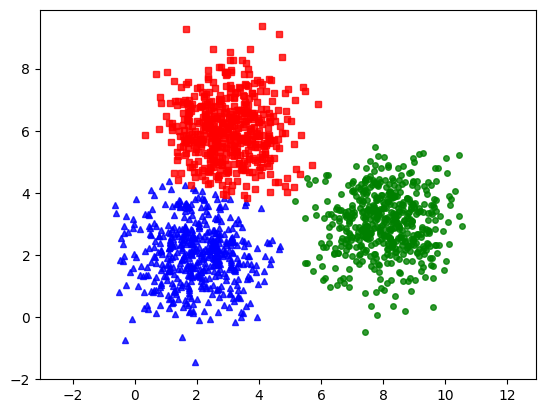

In [13]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm:')
print(centers[-1])
kmeans_display(X, labels[-1])

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


Centers found by scikit-learn:
[[1.97826939 2.00223913]
 [2.98759958 6.02896527]
 [8.0410628  3.02094748]]


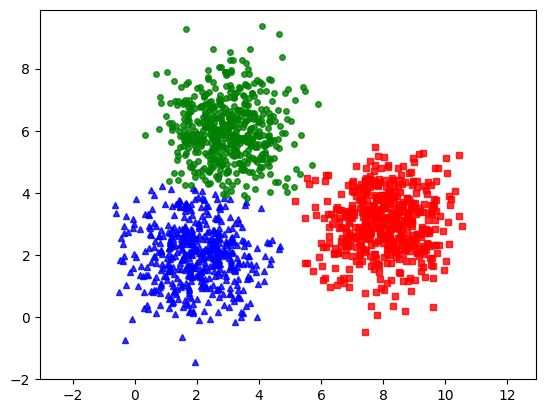

In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## Tự Thực hành 2

Áp dụng mô hình trên cho bài tập phân loại ảnh chó-mèo (xem lại phần CNN), thử thực hiện phân
cụm thành 02 cụm và kiểm tra kết quả.

In [37]:
import numpy as np
from keras.datasets import mnist

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import fetch_openml

# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # Normalize data
y = mnist.target.astype(int)

# Function to visualize filters
def display_network(A, m=-1, n=-1):
    # Rescale
    A = A - np.average(A)
    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))
        
    k = 0
    
    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue
            clim = np.max(np.abs(A[:, k]))

            image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz +buf):buf + j * (sz + buf) + sz] = \
                A[:, k].reshape(sz, sz) / clim
            k += 1
    return image

def display_color_network(A):
    if np.min(A) >= 0:
        A = A - np.mean(A)
    cols = np.round(np.sqrt(A.shape[1]))
    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1

    rows = np.ceil(A.shape[1] / cols)
    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]
    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))
    for i in range(int(rows)):
        for j in range(int(cols)):
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols
            + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols
            + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols
            + j].reshape(dim, dim)
        
    image = (image + 1) / 2
    return image

# K-means clustering
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

# Visualization of cluster centers
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap="jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()

# Visualization of nearest neighbors
N0 = 20
X1 = np.zeros((N0 * K, 784))
X2 = np.zeros((N0 * K, 784))
for k in range(K):
    indices = np.where(pred_label == k)[0]
    Xk = X[indices] 
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    X1[N0 * k: N0 * k + N0, :] = Xk[nearest_id, :]
    X2[N0 * k: N0 * k + N0, :] = Xk[:N0, :]

plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest')
plt.gray()
plt.show()


In [34]:
import gzip
import shutil

def gunzip_file(gzipped_file, output_file):
    with gzip.open(gzipped_file, 'rb') as f_in:
        with open(output_file, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

# Example usage
gzipped_file = 'C:/Users/Admin/Desktop/ML/week4/train-labels-idx1-ubyte.gz'  # Path to your gzipped file'
output_file = 'C:/Users/Admin/Desktop/ML/week9/MNIST/train-labels-idx1-ubyte'  # Path for the output unzipped file

gunzip_file(gzipped_file, output_file)


In [39]:
# mndata = MNIST('../MNIST/')
# mndata.load_testing()
# X = mndata.test_images

(train_X, train_y), (x, y) = mnist.load_data()
X0 = np.asarray(X)[:1000,:]/256.0
X = X0
K = 10
kmeans = KMeans(n_clusters=K).fit(X)
pred_label = kmeans.predict(X)

11490434/11490434 [==============================] - 101s 9us/step


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [40]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)
f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')
# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())
# map the normalized data to colors
# image is now RGBA (512x512x4)
image = cmap(norm(A))
import scipy.misc
scipy.misc.imsave('aa.png', image)

<class 'numpy.ndarray'>
(2, 10)


ValueError: cannot reshape array of size 2 into shape (2,2)

In [ ]:
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))
for k in range(K):
    Xk = X0[pred_label == k, :]
    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id = neigh.kneighbors(center_k, N0)
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]


In [ ]:

plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

In [ ]:
def k_means(X, k, max_iters=100):
    # Khởi tạo ngẫu nhiên các trung tâm cụm ban đầu từ dữ liệu
    centers = X[np.random.choice(len(X), k, replace=False)]
    
    for _ in range(max_iters):
        # Gán nhãn cho mỗi điểm dữ liệu bằng cách chọn trung tâm gần nhất
        labels = np.argmin(np.linalg.norm(X[:, None] - centers, axis=2), axis=1)
        
        # Cập nhật trung tâm cụm
        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Nếu trung tâm không thay đổi nhiều, dừng thuật toán
        if np.allclose(centers, new_centers):
            break
        
        centers = new_centers
    
    return labels

In [ ]:
def load_data(cat_folder, dog_folder):
    X = []
    y = []
    
    # Load ảnh mèo
    for filename in os.listdir(cat_folder):
        img_path = os.path.join(cat_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  # Resize ảnh về kích thước 28x28
        X.append(img.flatten())  # Chuyển ảnh thành mảng 1 chiều
        y.append(0)  # Gán nhãn 0 cho ảnh mèo
    
    # Load ảnh chó
    for filename in os.listdir(dog_folder):
        img_path = os.path.join(dog_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))  # Resize ảnh về kích thước 28x28
        X.append(img.flatten())  # Chuyển ảnh thành mảng 1 chiều
        y.append(1)  # Gán nhãn 1 cho ảnh chó
    
    return np.array(X), np.array(y)

In [ ]:
# Load data
cat_folder = "cats/"
dog_folder = "dogs/"
X, y = load_data(cat_folder, dog_folder)

In [ ]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (ở đây chúng ta sẽ sử dụng 80% dữ liệu làm tập huấn luyện)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# Phân cụm dữ liệu
k = 2  # Số lượng cụm (chó, mèo)
train_cluster_labels = k_means(X_train, k)

In [ ]:
# Đánh nhãn cho cụm dựa trên phân phối của các nhãn trong cụm
cluster_labels_mapping = {}  # Dictionary để lưu trữ ánh xạ từ cụm sang nhãn
for cluster in range(k):
    # Đếm số lượng mỗi nhãn trong cụm
    labels, counts = np.unique(y_train[train_cluster_labels == cluster], return_counts=True)
    # Chọn nhãn có tần suất xuất hiện cao nhất làm nhãn cho cụm
    dominant_label = labels[np.argmax(counts)]
    cluster_labels_mapping[cluster] = dominant_label

In [ ]:
# Dự đoán nhãn cho dữ liệu kiểm tra dựa trên ánh xạ từ cụm sang nhãn
test_cluster_labels = k_means(X_test, k)
predicted_labels = np.array([cluster_labels_mapping[cluster] for cluster in test_cluster_labels])

In [ ]:
# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

# 2. PHẦN MÔ HÌNH TRỘN GAUSSIAN (GAUSSIAN MIXTURE MODEL)

## Tự Thực hành 1

Sử dụng đoạn code trên để áp dựng cho dữ liệu là phần đầu vào của tập dữ liệu hoa
Iris (bỏ trường tên loại hoa). Sau khi phân cụm xong hãy đối sánh kết quả với các phân loại đúng.

In [41]:
import numpy as np
from numpy import random
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
class GMM():
    def __init__(self, k, dim, init_mu=None, init_sigma=None, init_pi=None, colors=None):
        '''
        Define a model with a known number of clusters and dimensions.
        input:
            - k: Number of Gaussian clusters
            - dim: Dimension 
            - init_mu: initial value of mean of clusters (k, dim)
                       (default) random from uniform[-10, 10]
            - init_sigma: initial value of covariance matrix of clusters (k, dim, dim)
                          (default) Identity matrix for each cluster
            - init_pi: initial value of cluster weights (k,)
                       (default) equal value to all cluster i.e. 1/k
            - colors: Color value for plotting each cluster (k, 3)
                      (default) random from uniform[0, 1]
        '''
        self.k = k
        self.dim = dim
        if(init_mu is None):
            init_mu = random.rand(k, dim)*20 - 10
        self.mu = init_mu
        if(init_sigma is None):
            init_sigma = np.zeros((k, dim, dim))
            for i in range(k):
                init_sigma[i] = np.eye(dim)
        self.sigma = init_sigma
        if(init_pi is None):
            init_pi = np.ones(self.k)/self.k
        self.pi = init_pi
        if(colors is None):
            colors = random.rand(k, 3)
            for i in range(k):
                colors[i, 2] = i/k
        self.colors = colors
    
    def init_em(self, X):
        '''
        Initialization for EM algorithm.
        input:
            - X: data (batch_size, dim)
        '''
        self.data = X
        self.num_points = X.shape[0]
        self.z = np.zeros((self.num_points, self.k))
    
    def e_step(self):
        '''
        E-step of EM algorithm.
        '''
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mu[i], cov=self.sigma[i])
        self.z /= self.z.sum(axis=1, keepdims=True)
    
    def m_step(self):
        '''
        M-step of EM algorithm.
        '''
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.num_points
        self.mu = np.matmul(self.z.T, self.data)
        self.mu /= sum_z[:, None]
        for i in range(self.k):
            j = np.expand_dims(self.data, axis=1) - self.mu[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.sigma[i] /= sum_z[i]
            
    def log_likelihood(self, X):
        ll = []
        for d in X:
            tot = 0
            for i in range(self.k):
                try:
                    likelihood = multivariate_normal.pdf(d, mean=self.mu[i], cov=self.sigma[i])
                    tot += self.pi[i] * likelihood
                except np.linalg.LinAlgError:
                    print("Singular covariance matrix encountered. Skipping component", i)
            ll.append(np.log(tot))
        return np.sum(ll)

    
    def plot_gaussian(self, mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
        '''
        Utility function to plot one Gaussian from mean and covariance.
        '''
        pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
            width=ell_radius_x * 2,
            height=ell_radius_y * 2,
            facecolor=facecolor,
            **kwargs)
        scale_x = np.sqrt(cov[0, 0]) * n_std
        mean_x = mean[0]
        scale_y = np.sqrt(cov[1, 1]) * n_std
        mean_y = mean[1]
        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mean_x, mean_y)
        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    def draw(self, ax, n_std=2.0, facecolor='none', **kwargs):
        '''
        Function to draw the Gaussians.
        Note: Only for two-dimensional dataset
        '''
        if(self.dim != 2):
            print("Drawing available only for 2D case.")
            return
        for i in range(self.k):
            self.plot_gaussian(self.mu[i], self.sigma[i], ax, n_std=n_std, edgecolor=self.colors[i], **kwargs)

In [43]:
# Load Iris dataset
iris = pd.read_csv('C:/Users/Admin/Desktop/ML/week5/iris.csv')
# Remove the last column (flower species)
X = iris.iloc[:, :-1].values

# Create a Gaussian Mixture Model
gmm = GMM(3, 4)

# Initialize EM algorithm with data
gmm.init_em(X)

num_iters = 20
log_likelihood = [gmm.log_likelihood(X)]

In [44]:

def plot(title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-22, 22))
    ax.set_ylim((-22, 22))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

Drawing available only for 2D case.


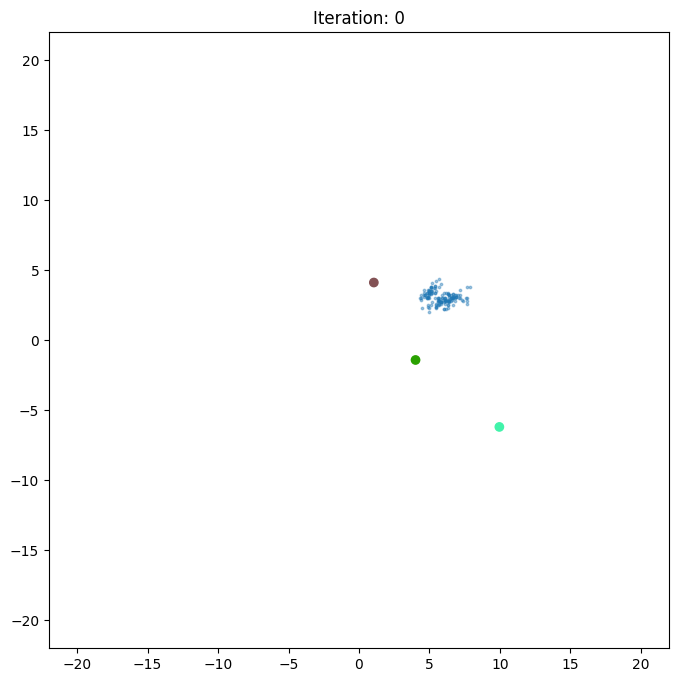

Iteration: 1, log-likelihood: -379.9146
Drawing available only for 2D case.


<Figure size 640x480 with 0 Axes>

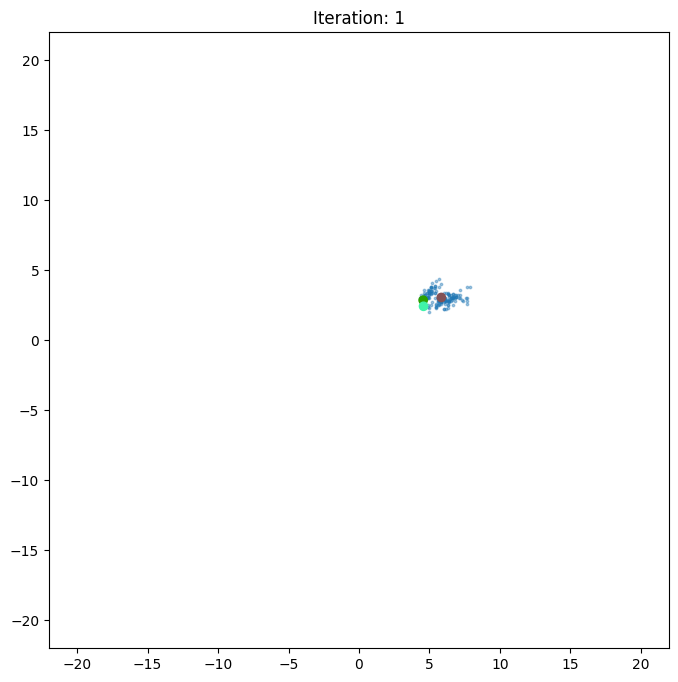

Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matrix encountered. Skipping component 2
Singular covariance matr

<Figure size 640x480 with 0 Axes>

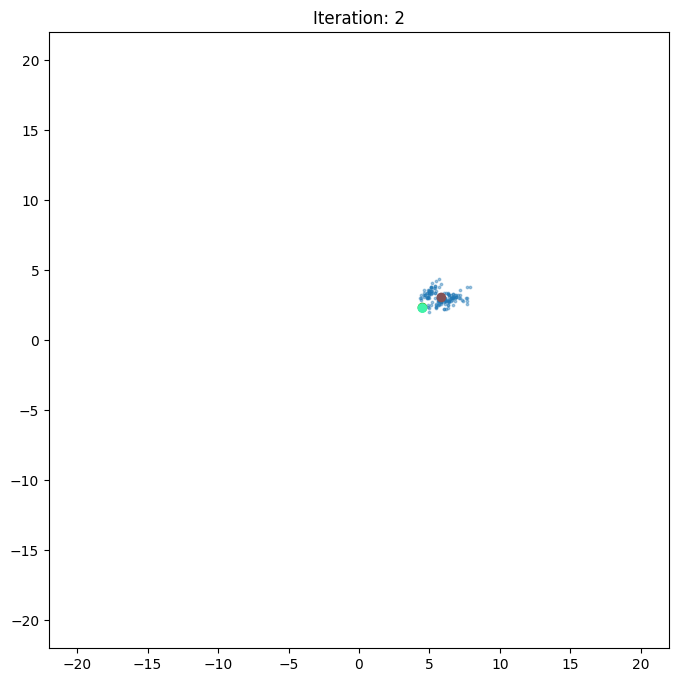

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

<Figure size 640x480 with 0 Axes>

In [45]:
# Plot initial state
plot("Iteration: 0")

# EM algorithm
for e in range(num_iters):
    # E-step
    gmm.e_step()
    # M-step
    gmm.m_step()
    # Compute log-likelihood
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(e+1, log_likelihood[-1]))
    # Plot
    plot(title="Iteration: " + str(e+1))

Drawing available only for 2D case.


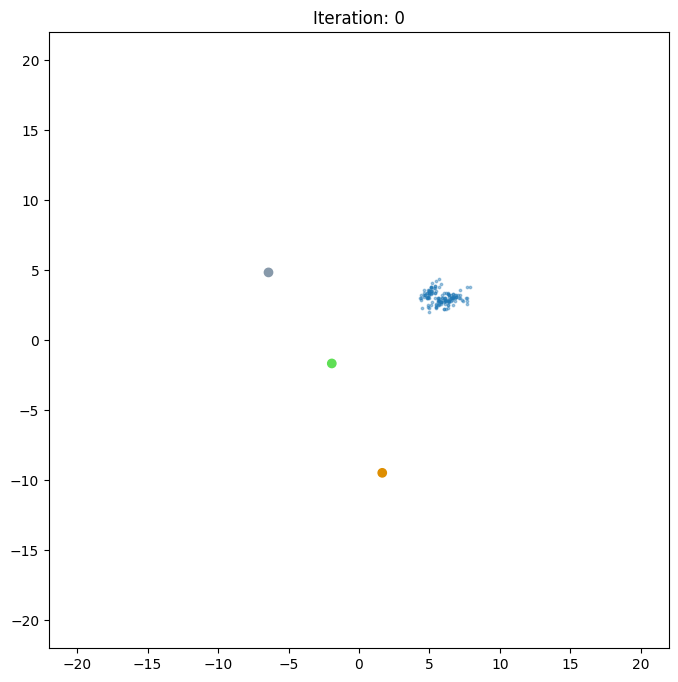

Iteration: 1, log-likelihood: -379.9145
Drawing available only for 2D case.


<Figure size 640x480 with 0 Axes>

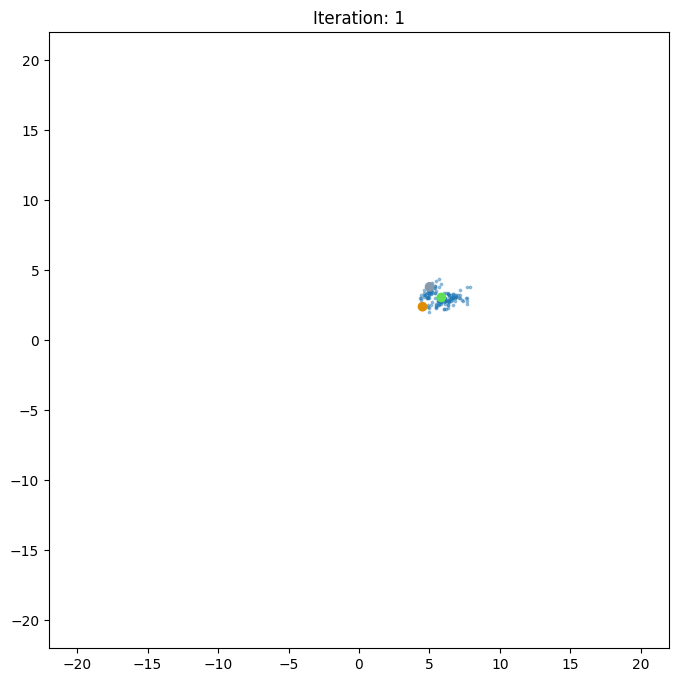

Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matrix encountered. Skipping component 0
Singular covariance matr

<Figure size 640x480 with 0 Axes>

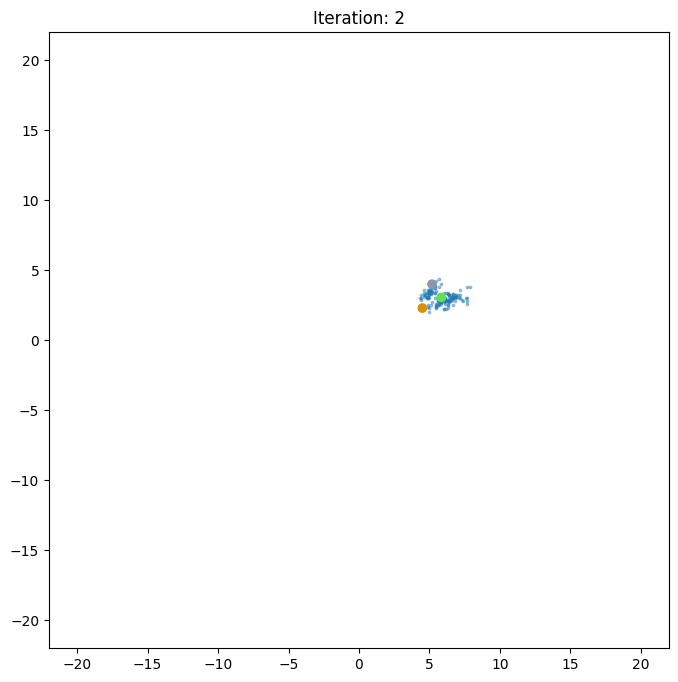

LinAlgError: When `allow_singular is False`, the input matrix must be symmetric positive definite.

<Figure size 640x480 with 0 Axes>

In [46]:
import numpy as np
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn import datasets

class GMM():
    def __init__(self, k, dim, init_mu=None, init_sigma=None, init_pi=None, colors=None):
        '''
        Define a model with a known number of clusters and dimensions.
        input:
            - k: Number of Gaussian clusters
            - dim: Dimension 
            - init_mu: initial value of mean of clusters (k, dim)
                       (default) random from uniform[-10, 10]
            - init_sigma: initial value of covariance matrix of clusters (k, dim, dim)
                          (default) Identity matrix for each cluster
            - init_pi: initial value of cluster weights (k,)
                       (default) equal value to all cluster i.e. 1/k
            - colors: Color value for plotting each cluster (k, 3)
                      (default) random from uniform[0, 1]
        '''
        self.k = k
        self.dim = dim
        if(init_mu is None):
            init_mu = np.random.rand(k, dim) * 20 - 10
        self.mu = init_mu
        if(init_sigma is None):
            init_sigma = np.zeros((k, dim, dim))
            for i in range(k):
                init_sigma[i] = np.eye(dim)
        self.sigma = init_sigma
        if(init_pi is None):
            init_pi = np.ones(self.k) / self.k
        self.pi = init_pi
        if(colors is None):
            colors = np.random.rand(k, 3)
            for i in range(k):
                colors[i, 2] = i / k
        self.colors = colors
    
    def init_em(self, X):
        '''
        Initialization for EM algorithm.
        input:
            - X: data (batch_size, dim)
        '''
        self.data = X
        self.num_points = X.shape[0]
        self.z = np.zeros((self.num_points, self.k))
    
    def e_step(self):
        '''
        E-step of EM algorithm.
        '''
        for i in range(self.k):
            self.z[:, i] = self.pi[i] * multivariate_normal.pdf(self.data, mean=self.mu[i], cov=self.sigma[i])
        self.z /= self.z.sum(axis=1, keepdims=True)
    
    def m_step(self):
        '''
        M-step of EM algorithm.
        '''
        sum_z = self.z.sum(axis=0)
        self.pi = sum_z / self.num_points
        self.mu = np.matmul(self.z.T, self.data)
        self.mu /= sum_z[:, None]
        for i in range(self.k):
            j = np.expand_dims(self.data, axis=1) - self.mu[i]
            s = np.matmul(j.transpose([0, 2, 1]), j)
            self.sigma[i] = np.matmul(s.transpose(1, 2, 0), self.z[:, i] )
            self.sigma[i] /= sum_z[i]
            
    def log_likelihood(self, X):
        ll = []
        for d in X:
            tot = 0
            for i in range(self.k):
                try:
                    likelihood = multivariate_normal.pdf(d, mean=self.mu[i], cov=self.sigma[i])
                    tot += self.pi[i] * likelihood
                except np.linalg.LinAlgError:
                    print("Singular covariance matrix encountered. Skipping component", i)
            ll.append(np.log(tot))
        return np.sum(ll)

    
    def plot_gaussian(self, mean, cov, ax, n_std=3.0, facecolor='none', **kwargs):
        '''
        Utility function to plot one Gaussian from mean and covariance.
        '''
        pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
        ell_radius_x = np.sqrt(1 + pearson)
        ell_radius_y = np.sqrt(1 - pearson)
        ellipse = Ellipse((0, 0),
            width=ell_radius_x * 2,
            height=ell_radius_y * 2,
            facecolor=facecolor,
            **kwargs)
        scale_x = np.sqrt(cov[0, 0]) * n_std
        mean_x = mean[0]
        scale_y = np.sqrt(cov[1, 1]) * n_std
        mean_y = mean[1]
        transf = transforms.Affine2D() \
            .rotate_deg(45) \
            .scale(scale_x, scale_y) \
            .translate(mean_x, mean_y)
        ellipse.set_transform(transf + ax.transData)
        return ax.add_patch(ellipse)

    def draw(self, ax, n_std=2.0, facecolor='none', **kwargs):
        '''
        Function to draw the Gaussians.
        Note: Only for two-dimensional dataset
        '''
        if(self.dim != 2):
            print("Drawing available only for 2D case.")
            return
        for i in range(self.k):
            self.plot_gaussian(self.mu[i], self.sigma[i], ax, n_std=n_std, edgecolor=self.colors[i], **kwargs)

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features

# Create a Gaussian Mixture Model
gmm = GMM(3, 4)

# Initialize EM algorithm with data
gmm.init_em(X)

num_iters = 20
log_likelihood = [gmm.log_likelihood(X)]

def plot(title):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-22, 22))
    ax.set_ylim((-22, 22))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

# Plot initial state
plot("Iteration: 0")

# EM algorithm
for e in range(num_iters):
    # E-step
    gmm.e_step()
    # M-step
    gmm.m_step()
    # Compute log-likelihood
    log_likelihood.append(gmm.log_likelihood(X))
    print("Iteration: {}, log-likelihood: {:.4f}".format(e+1, log_likelihood[-1]))
    # Plot
    plot(title="Iteration: " + str(e+1))